# DATA PREPARATION - RECURSIVE FEATURE ELIMINATION
**Sayak Giri**  

**Sagnik Majumder**

**Aditya Misra**

**Debarshi Chakraborty**

## **Step 1** : 
**Import the necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from scipy import stats 
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
import warnings
warnings.filterwarnings('ignore')

## **Step 2** : 
**Get the data and remove irrelevant column at first sight**

In [2]:
df = pd.read_csv("data.csv")
df = df.rename(columns={"Bankrupt?": "Bankrupt"})
df = df.drop(df.columns[[94]], axis=1)
df.head()

,Bankrupt,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,0.035490


## **Step 3** : 
**Transform the response column to type OBJECT**

In [3]:
X = df.iloc[:,1:95]
Y = df.iloc[:,0]
Y_new = map(str, Y) 
Y_obj = pd.DataFrame(Y_new,columns= ["Bankrupt"])
Y_obj.dtypes

Bankrupt    object
dtype: object

## **Step 4** : 
**Checking the counts in each group of the binary response**

In [4]:
print(Y[Y==1].shape[0], Y[Y==0].shape[0])

220 6599


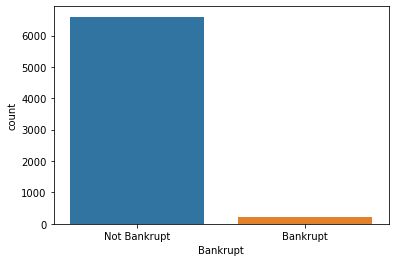

In [5]:
diagram = sns.countplot(df['Bankrupt'])
diagram.set_xticklabels(['Not Bankrupt','Bankrupt'])
plt.show()

## We can clearly see that the data is highly imbalanced

## **Step 5** : 
**Remove features that are correlated highly with one another as they convey similar information - esentially removing multicollimearity**

In [6]:
correlated_features = set()
col_no = set()
correlation_matrix = df.drop('Bankrupt', axis=1).corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.75:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
            col_no.add(i)            

In [7]:
correlated_features

{' After-tax net Interest Rate',
 ' Cash Flow to Sales',
 ' Continuous interest rate (after tax)',
 ' Current Assets/Total Assets',
 ' Current Liabilities/Equity',
 ' Current Liability to Assets',
 ' Current Liability to Equity',
 ' Current Liability to Liability',
 ' Equity to Long-term Liability',
 ' Gross Profit to Sales',
 ' Liability to Equity',
 " Net Income to Stockholder's Equity",
 ' Net Income to Total Assets',
 ' Net Value Per Share (A)',
 ' Net Value Per Share (C)',
 ' Net Worth Turnover Rate (times)',
 ' Net profit before tax/Paid-in capital',
 ' Net worth/Assets',
 ' Operating Funds to Liability',
 ' Operating Profit Per Share (Yuan ¥)',
 ' Operating profit/Paid-in capital',
 ' Per Share Net profit before tax (Yuan ¥)',
 ' Persistent EPS in the Last Four Seasons',
 ' Pre-tax net Interest Rate',
 ' ROA(A) before interest and % after tax',
 ' ROA(B) before interest and depreciation after tax',
 ' Realized Sales Gross Margin',
 ' Regular Net Profit Growth Rate',
 ' Working C

In [8]:
df = df.drop(df.columns[[1,2,4,6,7,9,16,17,18,21,22,26,37,41,42,49,55,59,60,64,65,74,76,77,78,84,87,88,89]], axis=1)

In [9]:
df.head()

,Bankrupt,ROA(B) before interest and depreciation after tax,Realized Sales Gross Margin,After-tax net Interest Rate,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),...,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Liability-Assets Flag,Net Income to Total Assets,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,1,0.405750,0.601457,0.808809,0.780985,1.256970e-04,0.0,0.458143,0.000725,0.0,...,0.458609,0.520382,0.312905,0,0.716845,0.827890,0.290202,0.026601,0.564050,0.016469
1,1,0.516730,0.610235,0.809301,0.781506,2.897850e-04,0.0,0.461867,0.000647,0.0,...,0.459001,0.567101,0.314163,0,0.795297,0.839969,0.283846,0.264577,0.570175,0.020794
2,1,0.472295,0.601364,0.808388,0.780284,2.361300e-04,25500000.0,0.458521,0.000790,0.0,...,0.459254,0.538491,0.314515,0,0.774670,0.836774,0.290189,0.026555,0.563706,0.016474
3,1,0.457733,0.583541,0.808966,0.781241,1.078890e-04,0.0,0.465705,0.000449,0.0,...,0.448518,0.604105,0.302382,0,0.739555,0.834697,0.281721,0.026697,0.564663,0.023982
4,1,0.522298,0.598783,0.809304,0.781550,7.890000e+09,0.0,0.462746,0.000686,0.0,...,0.454411,0.578469,0.311567,0,0.795016,0.839973,0.278514,0.024752,0.575617,0.035490


## **Step 6** : 
**Recursive feature elimination - an approch to select the most significant predictors**

In [22]:
X = df.drop('Bankrupt', axis=1)
target = df['Bankrupt'].astype('int64')
rfecv = RFECV(estimator=RandomForestClassifier(), step=4, cv=StratifiedKFold(4), scoring='precision')
rfecv = rfecv.fit(X, target)

In [23]:
rfecv.support_

array([ True,  True,  True,  True,  True, False, False,  True, False,
        True, False,  True, False,  True, False, False,  True,  True,
        True, False,  True,  True,  True,  True,  True, False,  True,
        True, False, False,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True, False,  True, False,  True,
       False,  True,  True, False,  True,  True,  True, False,  True,
        True,  True, False, False, False,  True,  True,  True,  True,
        True,  True])

In [24]:
rfecv.ranking_

array([1, 1, 1, 1, 1, 3, 6, 1, 6, 1, 2, 1, 2, 1, 4, 2, 1, 1, 1, 4, 1, 1,
       1, 1, 1, 3, 1, 1, 5, 5, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 5,
       1, 6, 1, 1, 3, 1, 1, 1, 5, 1, 1, 1, 4, 4, 6, 1, 1, 1, 1, 1, 1])

In [25]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 45


**RFECV gives too many features as optimal** : *Further filtering needed* - WHAT TO DO?

In [26]:
b = list(rfecv.support_)
a = list(X.columns)
df_rfecv = pd.DataFrame(b,a)
df_rfecv.reset_index(inplace = True)
df_rfecv.columns = ['Features','Support']
df_rfecv1 = df_rfecv[df_rfecv.iloc[:,1] == True]
df_rfecv1['importance'] = rfecv.estimator_.feature_importances_
df_rfecv2 = df_rfecv1.sort_values(by=['importance'],ascending=False).head(20)
df_rfecv2

,Features,Support,importance
9,Persistent EPS in the Last Four Seasons,True,0.051543
17,Net Value Growth Rate,True,0.047821
60,Net Income to Stockholder's Equity,True,0.038493
27,Net profit before tax/Paid-in capital,True,0.030372
26,Borrowing dependency,True,0.030133
59,Net Income to Total Assets,True,0.028328
21,Quick Ratio,True,0.027750
39,Cash/Total Assets,True,0.026876
63,Interest Coverage Ratio (Interest expense to ...,True,0.026565
62,Degree of Financial Leverage (DFL),True,0.026425


**A rough visual inspection of the importance of the features**

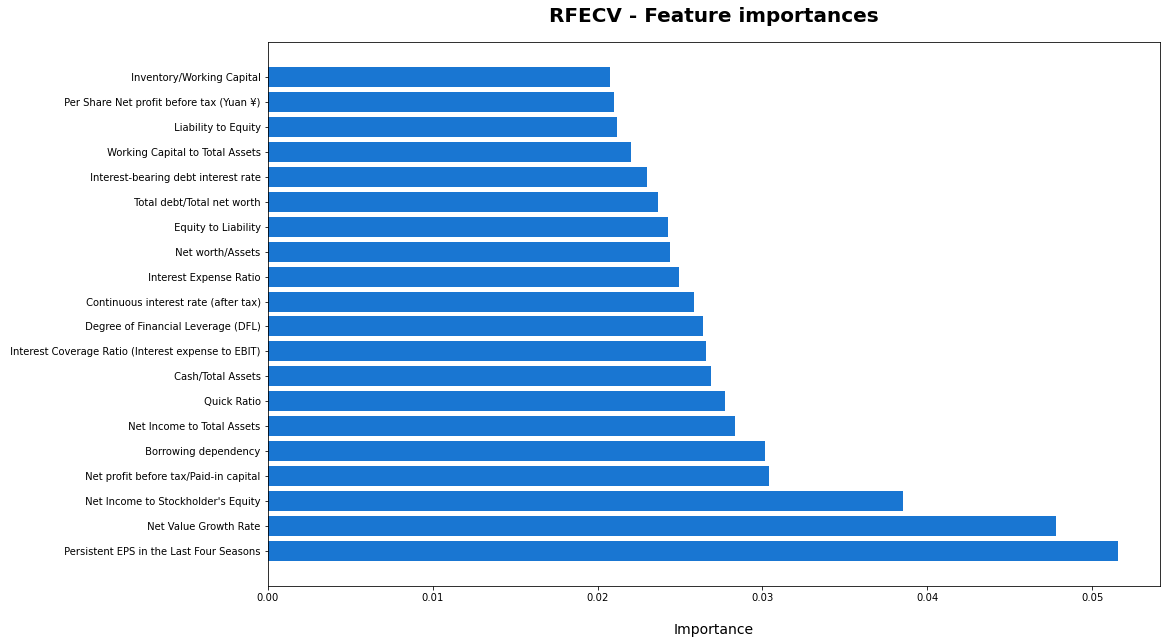

In [27]:
plt.figure(figsize=(16, 10))
plt.barh(y=df_rfecv2['Features'], width=df_rfecv2['importance'], color='#1976D2')
plt.title('RFECV - Feature importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

**Can we filter by Point Biserial Correlation at this step?**

*But there is problem in computing PBC - see notebook PBC*

**How to tackle the imbalance problem?**

*These queries are to be solved now*

In [146]:
#from sklearn.model_selection import train_test_split
#from imblearn.over_sampling import RandomOverSampler
#from imblearn.under_sampling import RandomUnderSampler
#from imblearn.over_sampling import SMOTE
#X = df_new.iloc[:,1:94]
#Y = df_new.iloc[:,0]
#over_sample=SMOTE()
#df1, y_ros=over_sample.fit_resample(X,Y)